# In this assigment, 
you will be creating a ML model using reinforcement learning algorithms to create an optimal path

# Case Study

Domain:
    Logistics

focus:
    Optimal path

Business challenge/requirement:
    BluEx is a leading logistics company in India.  It's known for efficient delivery of packets to customers.  However BluEx is facing a challenge where its vandrivers are taking a suboptimal path for delivery.  This is causing delays and higher fuel cost.You as ML expert have to create a ML model using Reinforcement Learning so that efficient path is found through the program. 
Key issues:
    Data has lotsof attributes and classification could be tricky
Considerations:
    Reinforcement Learning is tricky,so the expectation is to come up with sample flow and full-fledged implementation will be done by team laterData volume-None. Sample data is hard coded in the program
    
Additional information-NABusiness benefitsUp to 15% fuelcost can be saved by taking optimal path


# Import Libraries

**Import the usual libraries **

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

# Data Set : No Data. We will program a requirement
####  These are the points in the route which driver can take

In [2]:
# List of points to be depcited on the route
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

# Drive has to go from point 0 to 7.  Let plot a node graph for the points

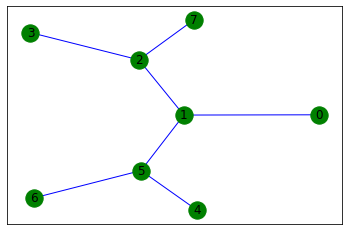

In [3]:
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'} 
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='g')
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()


# 
Create Matrix for number of points in the graph. In this case 8.

In [4]:
NO_OF_POINTS = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

# 
#### Assign values to path and points so that optimal path is choosen

In [5]:
# assign 0 to paths and 150 to goal  point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 150

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

# 
In the above matrix the y-axis is the state or where driver is currently located, and the x-axis is your possible next actions. We then build our Q-learning matrix which will hold all the lessons learned from our driver. The Q-learning model uses a transitional rule formula and gamma is the learning parameter

In [6]:
Q = np.matrix(np.zeros([NO_OF_POINTS,NO_OF_POINTS]))

# The learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [7]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 150.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 270.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_v

# 
** Q1. How many iterations did it take to find the most efficient path? **

Most efficient path:
[0, 1, 2, 7]


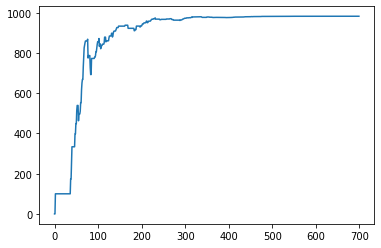

In [8]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

#
### Additional Exercise: Try the same for new path , now from Point 0 to Point 6. How many iterations will it take to find the efficient path
Path to be tracked is 0,1,5,6

# End of case study